In [ ]:
import pandas as pd


df = pd.read_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\benin-malanville.csv')  


df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [8]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


This table provides measures like mean, standard deviation, min, max, and quartiles for each numeric column. It helps us quickly see typical values and spot potential outliers or unexpected ranges.


In [9]:
df.isnull().sum()



Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

This table shows the total number of missing values for each column. We need to focus on columns with a high number of missing values, as these may need special handling or imputation.


In [10]:
missing = df.isnull().sum() / len(df)
print(missing[missing > 0.05])


Comments    1.0
dtype: float64


In [11]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [12]:
from scipy.stats import zscore

outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
zscores = df[outlier_cols].apply(zscore)
outlier_mask = (zscores.abs() > 3).any(axis=1)
print("Outlier rows:", outlier_mask.sum())


Outlier rows: 7740


We use Z-scores to identify extreme values likely to be errors or rare events.


In [14]:
df_clean = df[~outlier_mask].copy()
for col in outlier_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


We drop rows with extreme values and fill missing data using the median, making our data clean for comparison.


In [16]:
df_clean.to_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\benin-malanville.csv', index=False)


We save the cleaned data (never commit CSV files to Git).


c:\Users\Robel\OneDrive\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


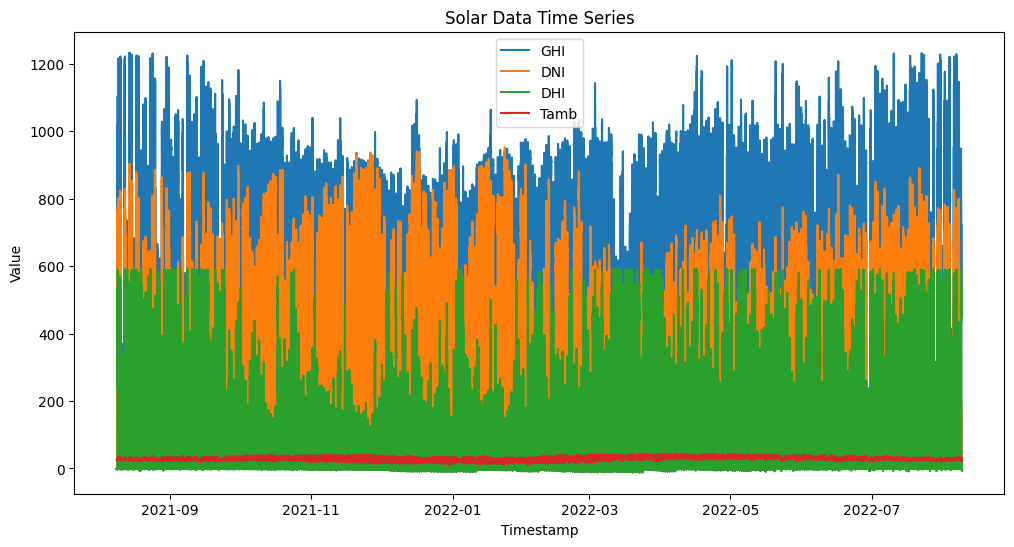

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['GHI'], label='GHI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['DNI'], label='DNI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['DHI'], label='DHI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['Tamb'], label='Tamb')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Solar Data Time Series')
plt.show()


Shows the time patterns for GHI, DNI, DHI, and ambient temperature—helpful for spotting trends or cycles.


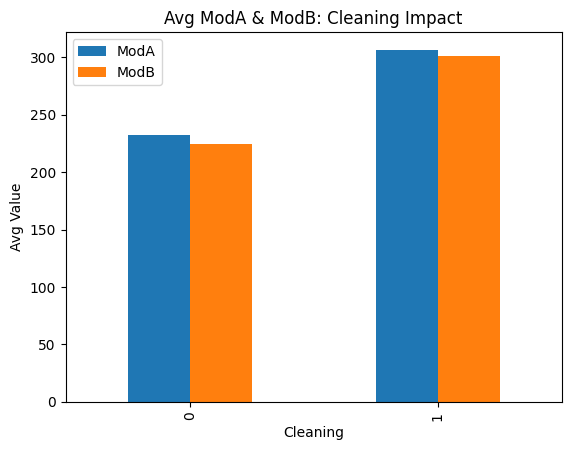

In [18]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot.bar()
plt.title('Avg ModA & ModB: Cleaning Impact')
plt.xlabel('Cleaning')
plt.ylabel('Avg Value')
plt.show()


Averages for ModA and ModB modules before/after cleaning events—visualizes effect of maintenance.


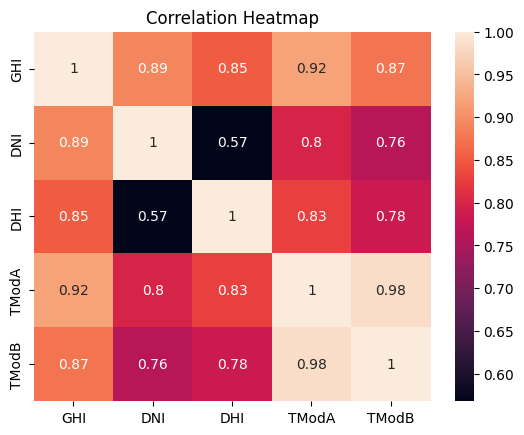

In [19]:
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()


Shows how closely different sensors and temperatures are related.


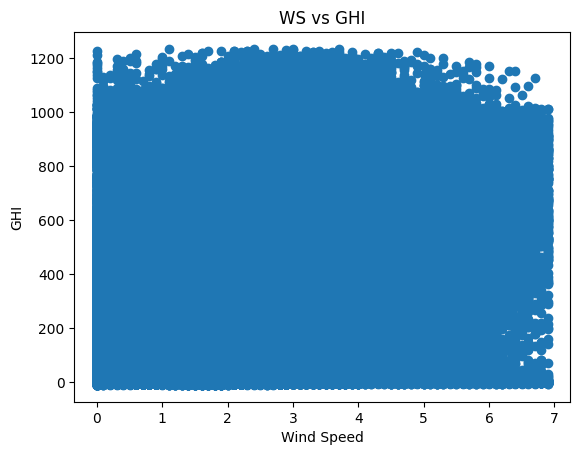

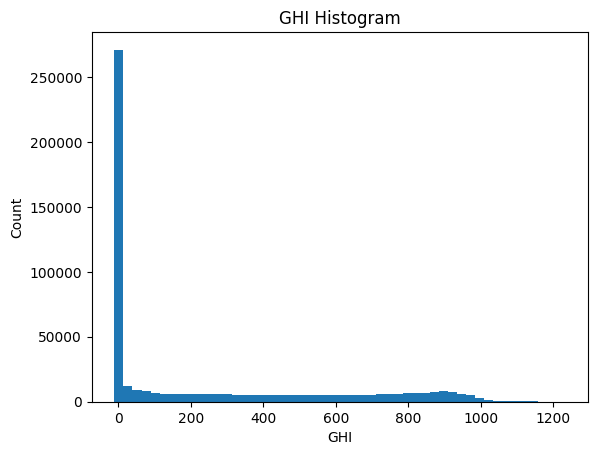

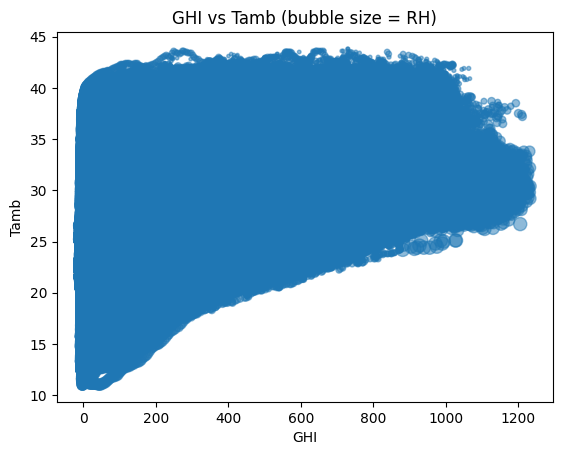

In [20]:
# Scatter plot: wind speed vs GHI
plt.scatter(df_clean['WS'], df_clean['GHI'])
plt.xlabel('Wind Speed')
plt.ylabel('GHI')
plt.title('WS vs GHI')
plt.show()

# Histogram: GHI distribution
plt.hist(df_clean['GHI'], bins=50)
plt.xlabel('GHI')
plt.ylabel('Count')
plt.title('GHI Histogram')
plt.show()

# Bubble chart: GHI vs Tamb (bubble size RH)
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.show()


Scatter, histogram, and bubble plots help visualize distributions and relationships in the dataset.


Key Insights

- Cleaned data is now ready for comparison and ranking.
- Distributions and visual relationships help find patterns or issues.
- Maintenance events (cleaning) impact module performance.
- Correlations guide which measurements to use for further analysis.
